### Politeness features and Markers in Convokit

This notebook demonstrates how to get politeness features and markers of a  corpus.

In [11]:
try:
    import convokit
except ModuleNotFoundError:
    !pip install convokit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.2/183.2 kB 2.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 677.1/677.1 kB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.4/300.4 kB 29.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 kB 21.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.4/53.4 kB 6.2 MB/s eta 0:00:00
  Created wheel for convokit: filename=convokit-3.0.0-py3-none-any.whl size=216707 sha256=8d2084d6ebfd71ae9d6c3f8f493d7490a6cf0224501228d5ab05e053669e3b6e
  Stored in directory: /root/.cache/pip/wheels/c4/89/8c/2677fdb888588b6f93cb6ac86bdfb020f1f1c

In [12]:
import convokit
import spacy

### 1. Loading and parsing dataset

The code below downloads the corpus and obtains the dependency parses for each utterance.

In [13]:
from convokit import Corpus, Speaker, Utterance
from convokit import download
from convokit import TextParser

In [14]:
corpus = Corpus(download("wiki-corpus"), utterance_end_index=4000)

parser = TextParser(verbosity=1000)
corpus = parser.transform(corpus)

No configuration file found at /root/.convokit/config.yml; writing with contents: 
# Default Backend Parameters
db_host: localhost:27017
data_directory: ~/.convokit/saved-corpora
default_backend: mem
1000/4001 utterances processed
2000/4001 utterances processed
3000/4001 utterances processed
4000/4001 utterances processed
4001/4001 utterances processed


### 2. Politeness Features and Markers

Here we add the politeness strategy information. By default, we obtain features considered in Stanford Politeness API. This choice can be changed by explicitly specifying the strategy collection of choice, e.g., `ps = PolitenessStrategies(strategy_collection="politeness_local"`) will extract only local politeness strategies. Support for other politeness strategy collections are forthcoming.

In [15]:
from convokit import PolitenessStrategies

ps = PolitenessStrategies()
corpus = ps.transform(corpus, markers=True)

Below is an example of politeness strategy data. For each positive occurance, we print out the markers, which are in the form of `[token, sentence index, sentence position]`.

In [16]:
utt = corpus.get_utterance('480633')
print("RAW TEXT: " + utt.text + "\n")

print("Sentences: ")
for i, x in enumerate(utt.meta["parsed"]):
    stra = ""
    for y in x["toks"]:
        stra += " " + y["tok"]

    print(str(i) + " " + stra[:50] + "...")

print()
for ((k,v),(k1,v2)) in zip(utt.meta["politeness_strategies"].items(),utt.meta["politeness_markers"].items()):
    if v != 0:
        print(k[21:len(k)-2] + " results:")
        print("Markers: " + str(v2) + "\n")

RAW TEXT: Hi JaGa. I am always puzzled as to why you ask me to do work which you are as capable of doing yourself as I am. We have spoken about this before. Wikipedia is a volunteer charity project, and people do their best in the time they have available to them, and people will tend to work initially in areas that interest them, and then help out on tedious tasks if they have the time or inclination - but nobody is compelled to do anything (well, other than to take care they are not doing harm). That particular splitting you are talking about was a long and complex one that nobody had done for more than two years because of the amount of work involved. Sending people a nag message at the end of it instead of pitching in and helping out yourself is not conducive to the spirit of support, co-operation and collaboration that embodies the spirit of Wikipedia that I respect and enjoy so much. If you spot a spelling mistake - fix it yourself instead of sending someone a message. If you see

We also provide support for extracting strategies directly with string inputs.

In [17]:
spacy_nlp = spacy.load('en_core_web_sm', disable=['ner'])

utt = ps.transform_utterance("hello, could you please help me proofread this article?", spacy_nlp=spacy_nlp)
utt.meta['politeness_strategies']

{'feature_politeness_==Please==': 1,
 'feature_politeness_==Please_start==': 0,
 'feature_politeness_==HASHEDGE==': 0,
 'feature_politeness_==Indirect_(btw)==': 0,
 'feature_politeness_==Hedges==': 0,
 'feature_politeness_==Factuality==': 0,
 'feature_politeness_==Deference==': 0,
 'feature_politeness_==Gratitude==': 0,
 'feature_politeness_==Apologizing==': 0,
 'feature_politeness_==1st_person_pl.==': 0,
 'feature_politeness_==1st_person==': 0,
 'feature_politeness_==1st_person_start==': 0,
 'feature_politeness_==2nd_person==': 1,
 'feature_politeness_==2nd_person_start==': 0,
 'feature_politeness_==Indirect_(greeting)==': 1,
 'feature_politeness_==Direct_question==': 0,
 'feature_politeness_==Direct_start==': 0,
 'feature_politeness_==HASPOSITIVE==': 0,
 'feature_politeness_==HASNEGATIVE==': 0,
 'feature_politeness_==SUBJUNCTIVE==': 1,
 'feature_politeness_==INDICATIVE==': 0}

# Important part!!!!

In [31]:
# read data
df_emails = pd.read_csv("normal_emails.csv")

# get the email column
emails = df_emails["Email"]

In [32]:
# for printing dictionaries in a nice way (short for "pretty print")
from pprint import pprint

In [33]:
# emails = [
#     "Fuck off! I hate you! But please mind the door on your way out. :) (Skilling style...!)",
#     "I love politeness. Please and thank you! I'm so sorry!!"
# ]

# iterate through the emails
df_data = []
for email in emails:
  utt = ps.transform_utterance((email), spacy_nlp=spacy_nlp)
  # pprint(utt.meta['politeness_strategies'])
  df_data.append(utt.meta['politeness_strategies'])

In [34]:
df = pd.DataFrame(df_data, index=df_emails.index)

In [35]:
df.to_csv("normal_emails_polite.csv")

### 3. Use of strategies within a corpus

We can get a basic overview of the corpus using `summarize()`:

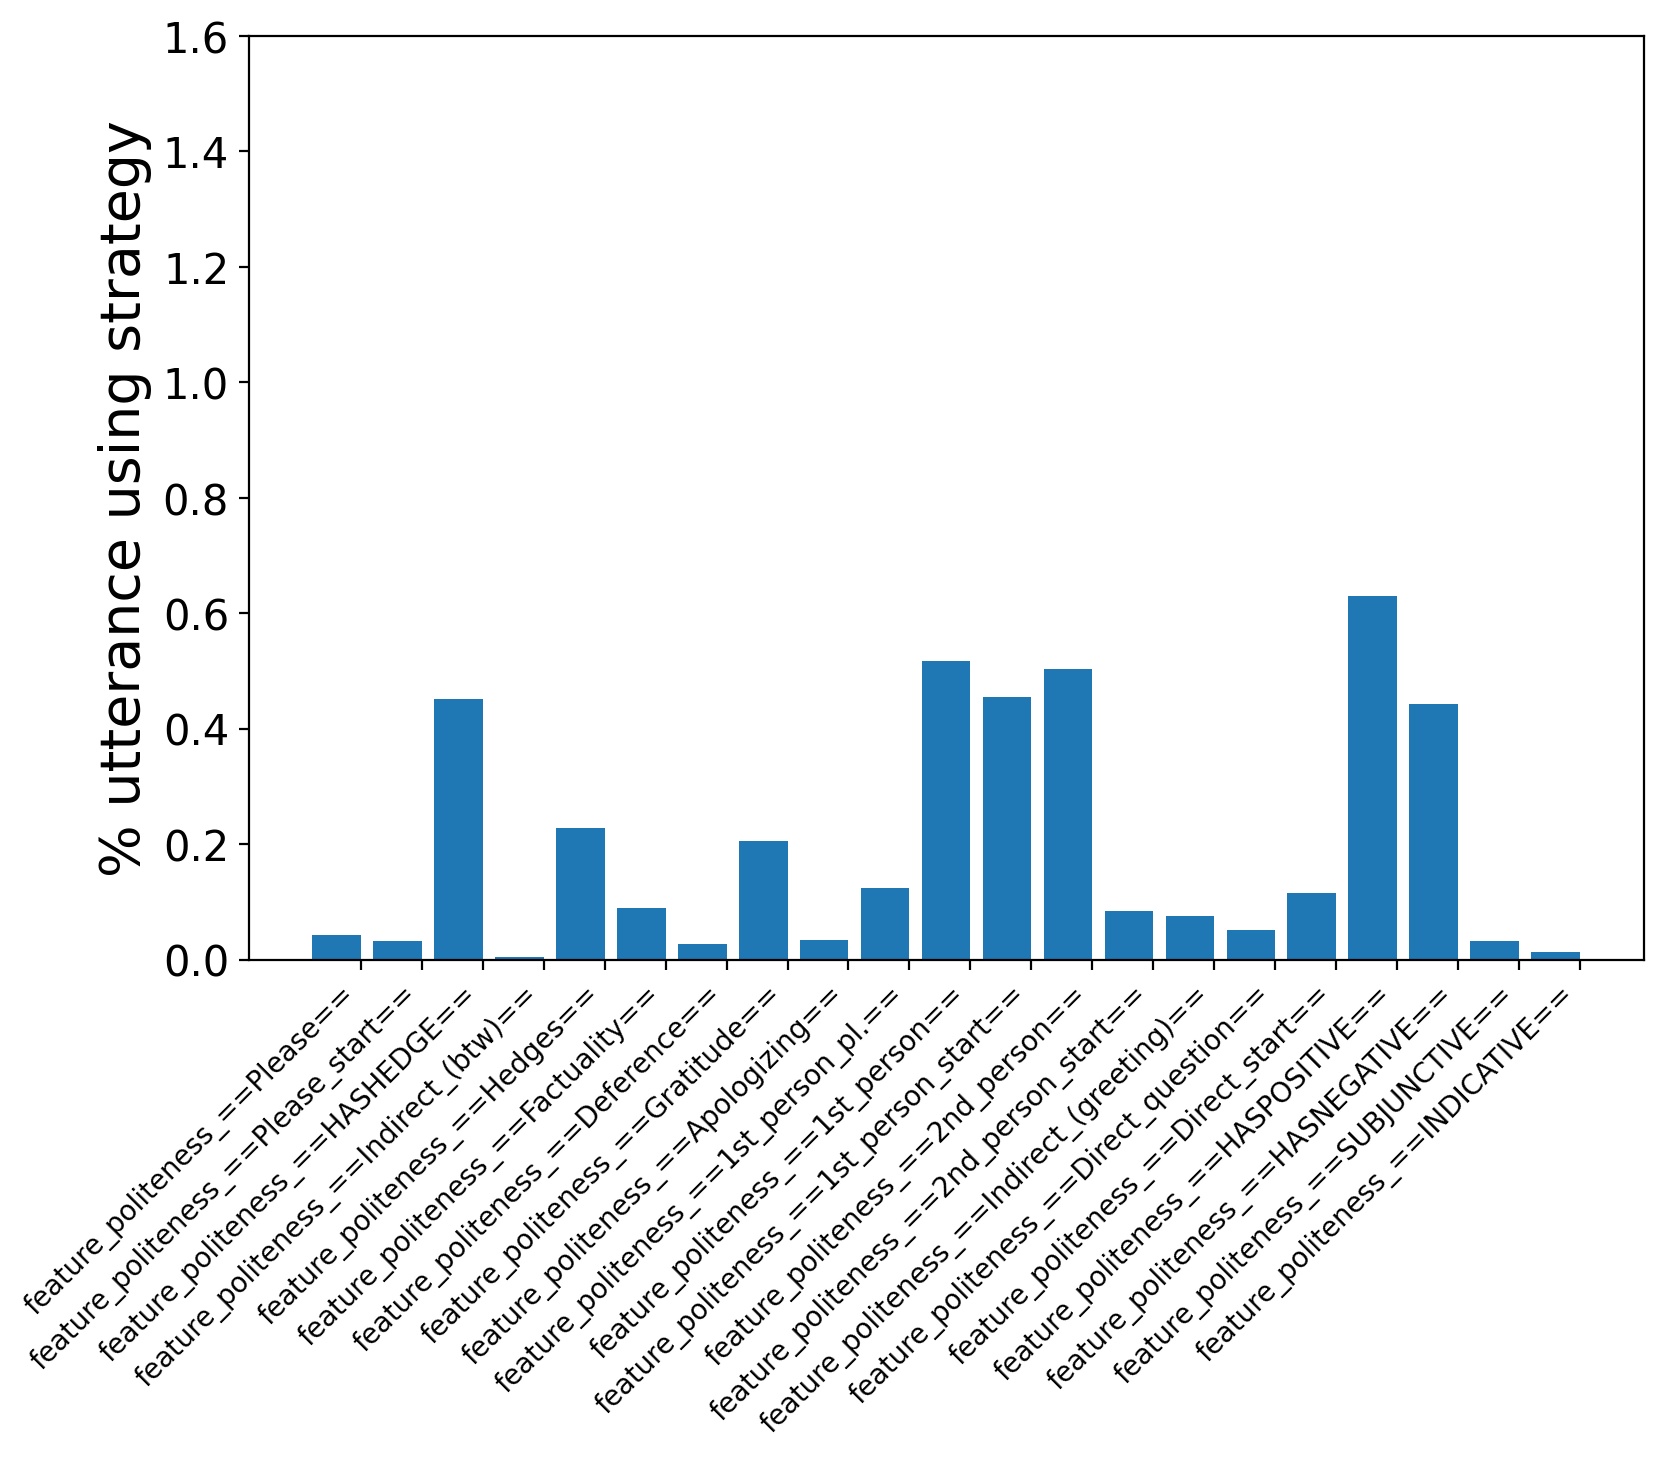

In [ ]:
data = ps.summarize(corpus, plot=True, y_lim = 1.6)

`Summarize()` can also be used to look a specific subsets of the dataset.

Queries are lambda functions which take in utterance metadata (utt.meta), and output true or false. `Summarize()` will use all utterances which pass the query.

In this example, summarize() only looks at utterances from non-admins.

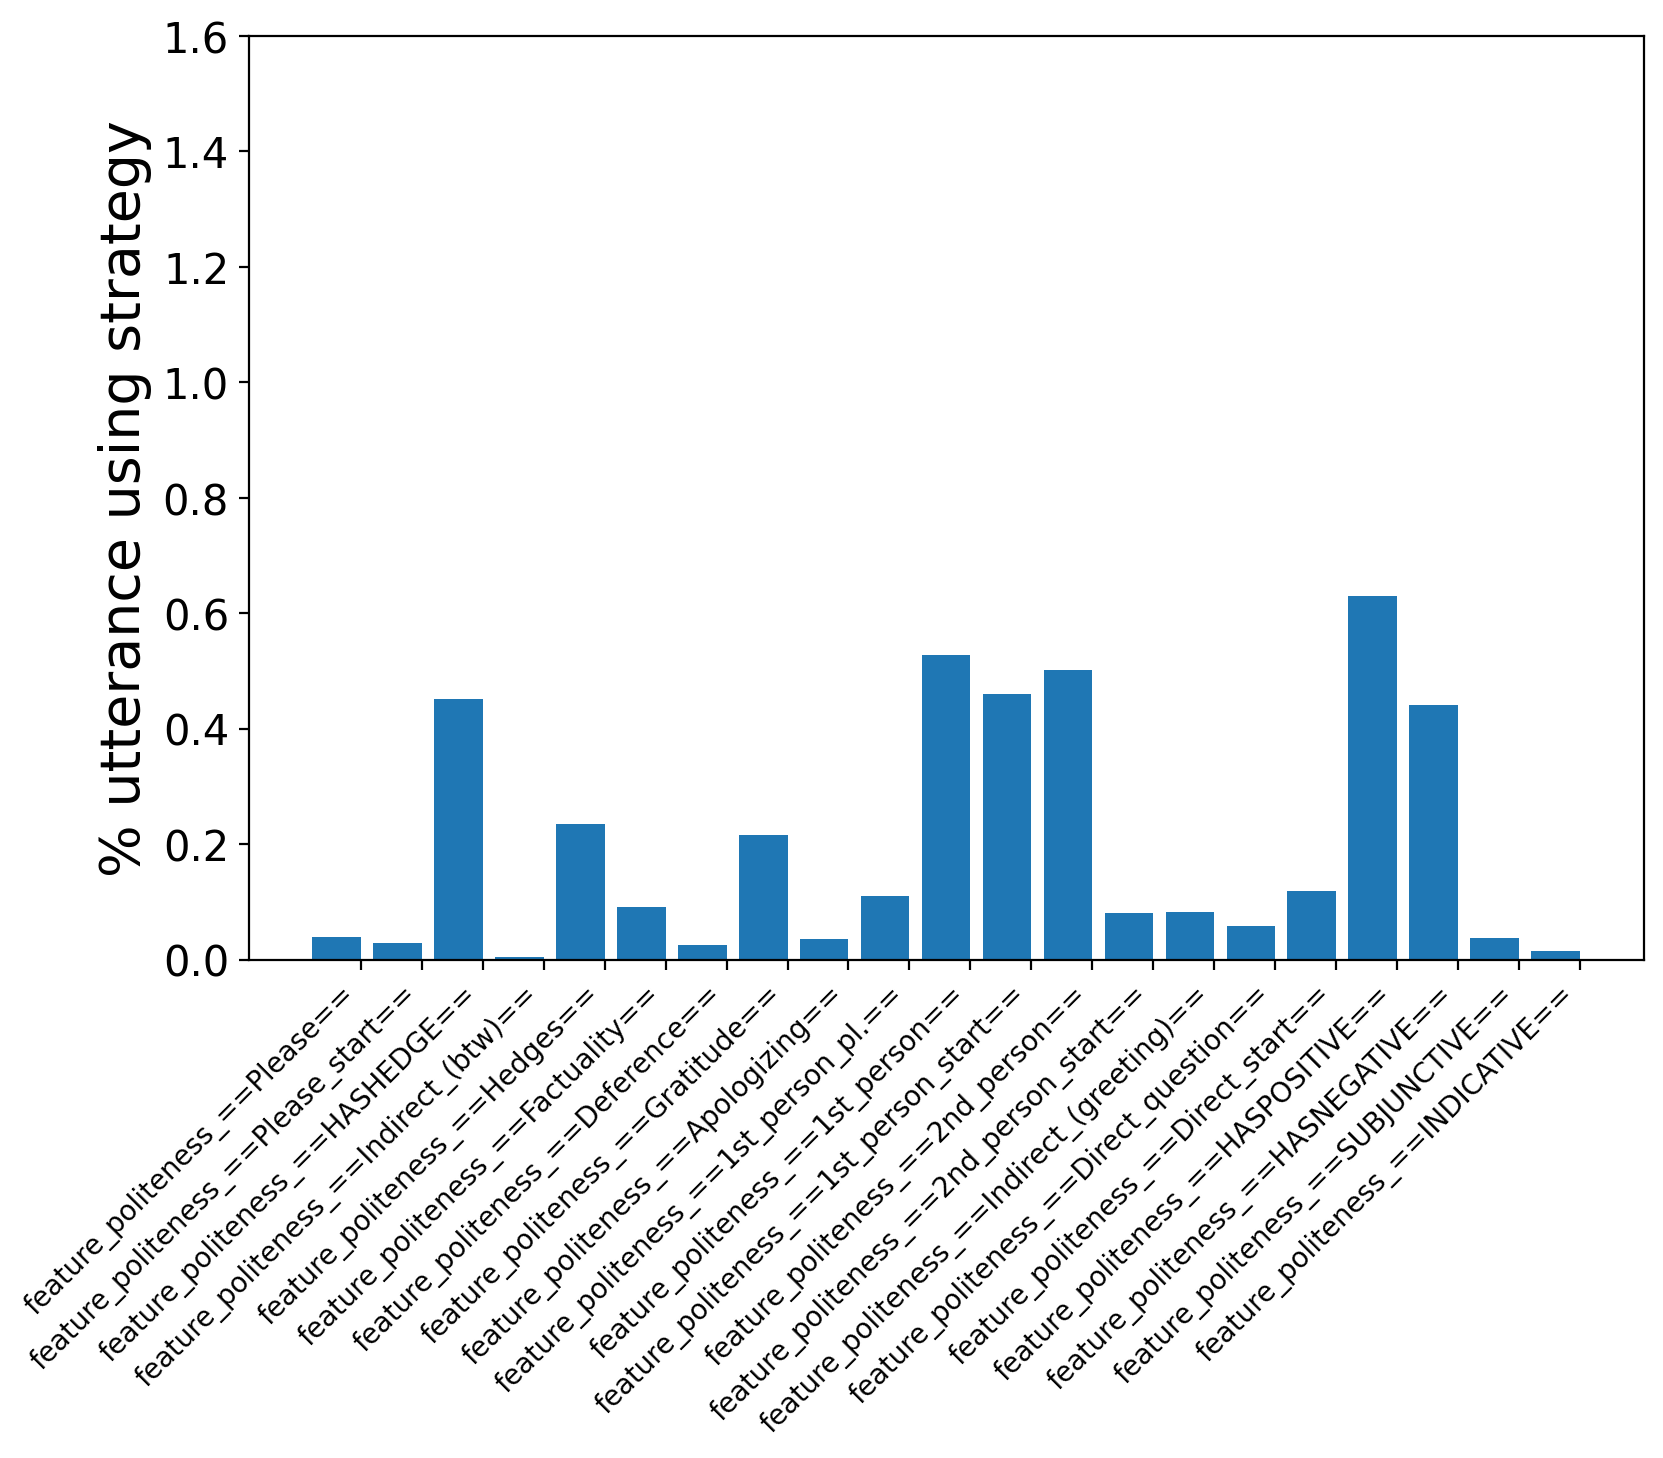

In [ ]:
query = lambda x : not x.meta["is-admin"]
non_admin_data = ps.summarize(corpus, query, plot = True, y_lim = 1.6)

Now we can get only admin data.

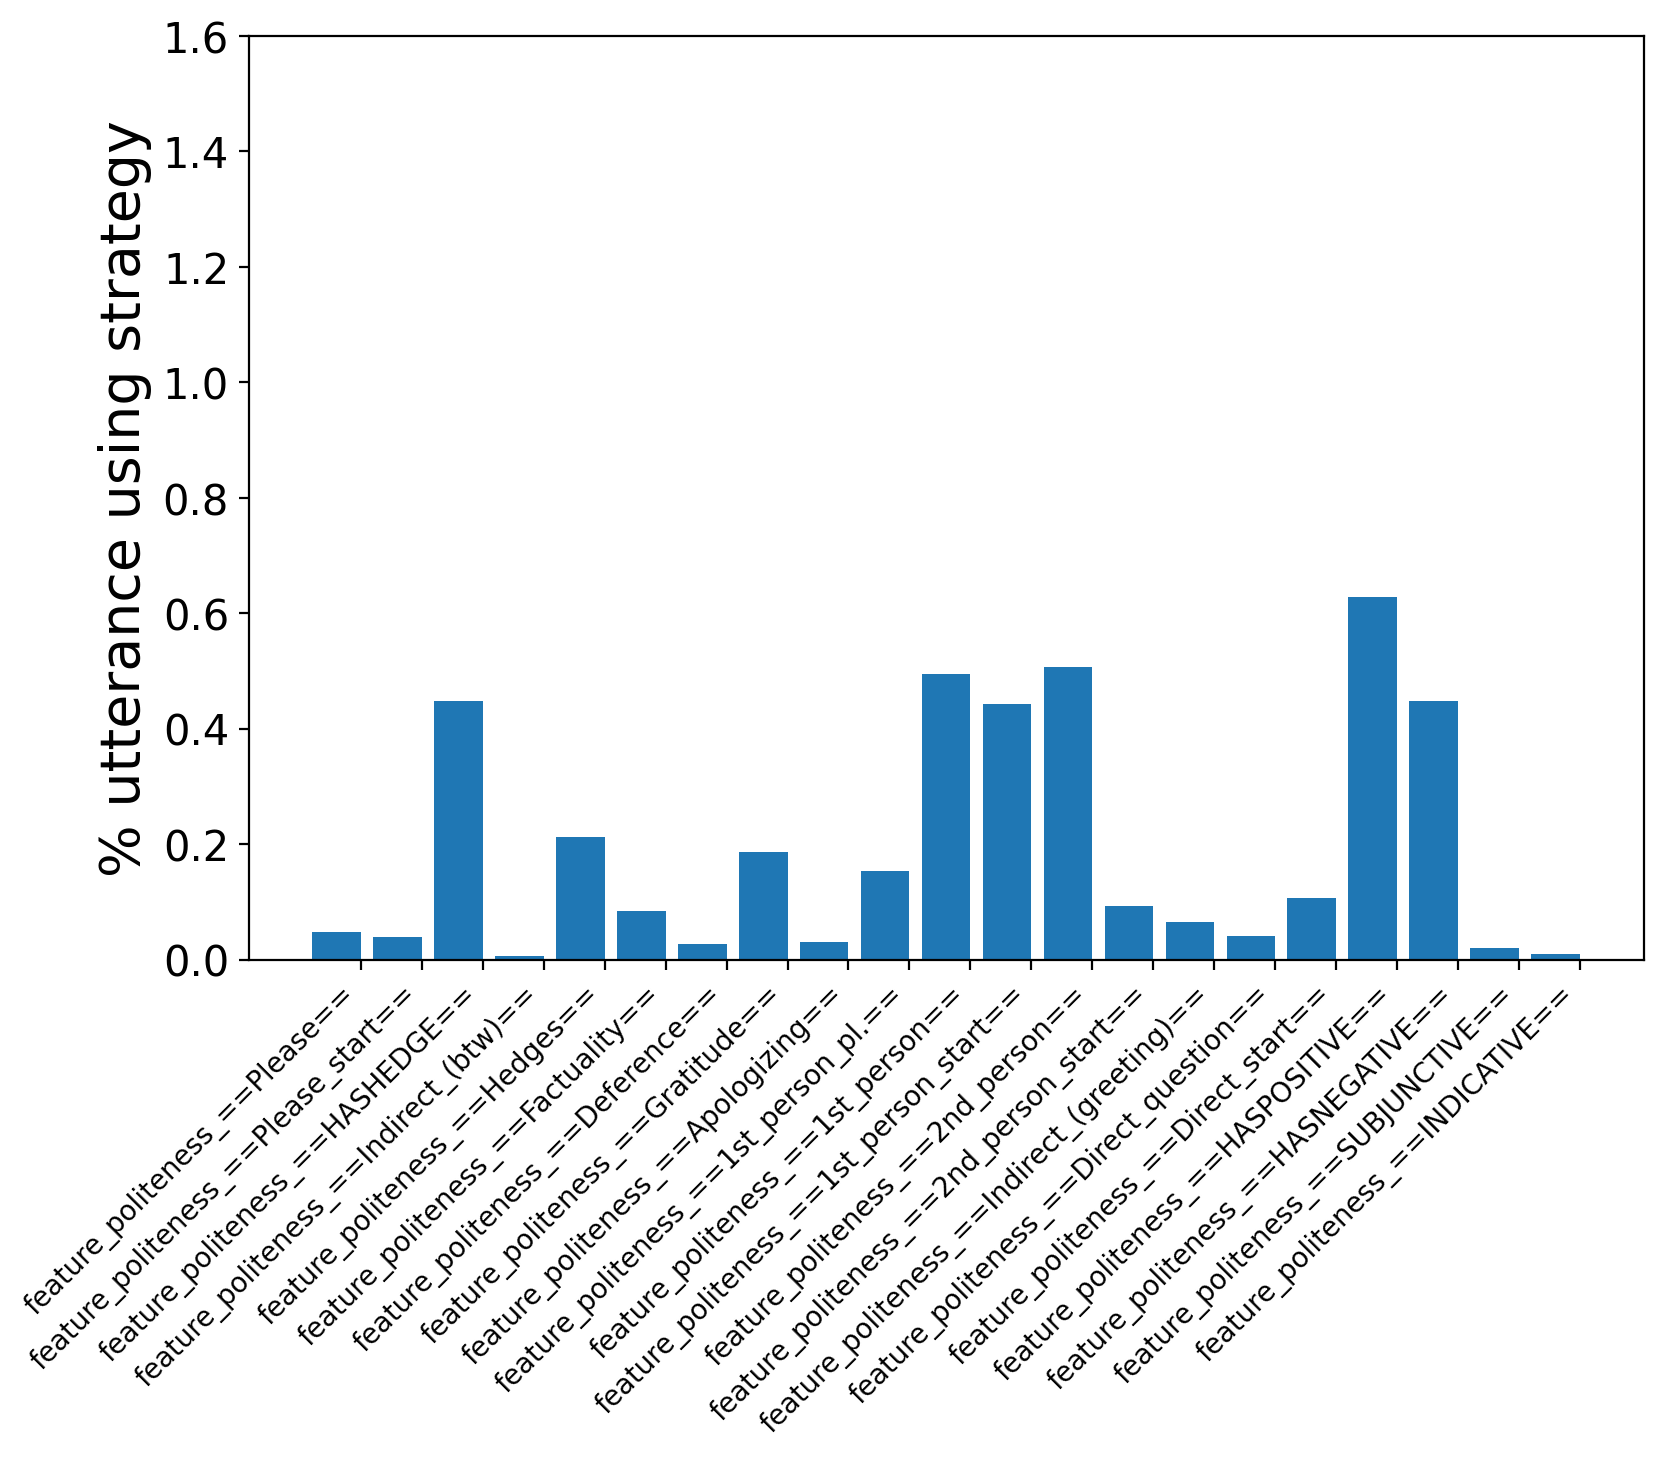

In [ ]:
query = lambda x : x.meta["is-admin"]
admin_data = ps.summarize(corpus, query, plot = True, y_lim = 1.6)

The occurance differences within admins and nonadmins is significant. As we can see, nonadmins are much more likely to use hedges and start their sentences with "I". Meanwhile, admins are more likely to use the words "We" and "you".

In [ ]:
round(non_admin_data - admin_data, 2)

feature_politeness_==Please==                -0.01
feature_politeness_==Please_start==          -0.01
feature_politeness_==HASHEDGE==               0.00
feature_politeness_==Indirect_(btw)==        -0.00
feature_politeness_==Hedges==                 0.02
feature_politeness_==Factuality==             0.01
feature_politeness_==Deference==             -0.00
feature_politeness_==Gratitude==              0.03
feature_politeness_==Apologizing==            0.01
feature_politeness_==1st_person_pl.==        -0.04
feature_politeness_==1st_person==             0.03
feature_politeness_==1st_person_start==       0.02
feature_politeness_==2nd_person==            -0.01
feature_politeness_==2nd_person_start==      -0.01
feature_politeness_==Indirect_(greeting)==    0.02
feature_politeness_==Direct_question==        0.02
feature_politeness_==Direct_start==           0.01
feature_politeness_==HASPOSITIVE==            0.00
feature_politeness_==HASNEGATIVE==           -0.01
feature_politeness_==SUBJUNCTIV